In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx


In [3]:
import pandas as pd

# Specify the path of your xlsx file
file_path = '/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx'

# Use pandas to read the Excel file
df = pd.read_excel(file_path)
print(df)


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [4]:
df.drop('StockCode', axis = 1, inplace =True)
df.drop('Country', axis = 1, inplace =True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   Description  540455 non-null  object        
 2   Quantity     541909 non-null  int64         
 3   InvoiceDate  541909 non-null  datetime64[ns]
 4   UnitPrice    541909 non-null  float64       
 5   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 24.8+ MB


In [7]:
df.drop(df[df['CustomerID'].isna()].index, inplace = True)
df.drop(df[df['Quantity'] < 0 ].index, inplace = True)
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
grouped_df = df.groupby(['InvoiceNo','CustomerID'])['TotalPrice'].sum().reset_index()

In [8]:
grouped_df = df.groupby(['CustomerID']).agg(
    total_orders=('InvoiceNo', 'count'),
    total_price=('TotalPrice', 'sum'),
    mean_price=('TotalPrice', 'mean')
).reset_index()

print(grouped_df)

      CustomerID  total_orders  total_price    mean_price
0        12346.0             1     77183.60  77183.600000
1        12347.0           182      4310.00     23.681319
2        12348.0            31      1797.24     57.975484
3        12349.0            73      1757.55     24.076027
4        12350.0            17       334.40     19.670588
...          ...           ...          ...           ...
4334     18280.0            10       180.60     18.060000
4335     18281.0             7        80.82     11.545714
4336     18282.0            12       178.05     14.837500
4337     18283.0           756      2094.88      2.771005
4338     18287.0            70      1837.28     26.246857

[4339 rows x 4 columns]


In [9]:
X = grouped_df.iloc[: , [1,3]]
X = X.to_numpy()
print(X)

[[1.00000000e+00 7.71836000e+04]
 [1.82000000e+02 2.36813187e+01]
 [3.10000000e+01 5.79754839e+01]
 ...
 [1.20000000e+01 1.48375000e+01]
 [7.56000000e+02 2.77100529e+00]
 [7.00000000e+01 2.62468571e+01]]


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-3.96512139e-01  5.25460210e+01]
 [ 3.94687670e-01 -3.04054623e-02]
 [-2.65374049e-01 -7.03757019e-03]
 ...
 [-3.48428173e-01 -3.64316011e-02]
 [ 2.90379646e+00 -4.46536571e-02]
 [-9.48945321e-02 -2.86573157e-02]]


In [11]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters = i , init = 'k-means++',random_state = 42)
    Kmeans.fit(X)
    inertia.append(Kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

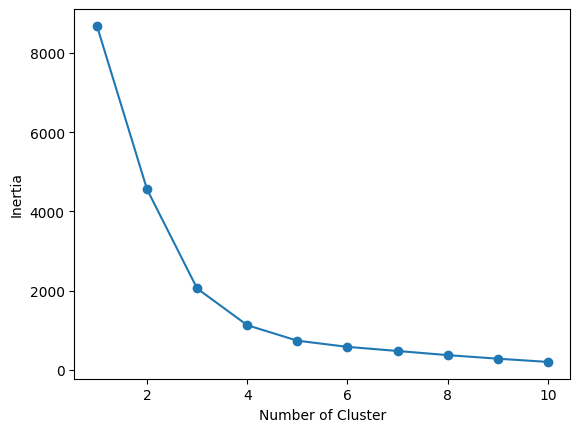

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), 
         inertia,
         marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')

In [28]:
k_means = KMeans(n_clusters = 3 , n_init = 'auto',random_state = 42)
k_means.fit(X)
grouped_df['cluster'] = k_means.labels_

In [29]:
print(clusters)

      CustomerID  total_orders    mean_price  cluster
0        12346.0             1  77183.600000        1
1        12347.0           182     23.681319        0
2        12348.0            31     57.975484        0
3        12349.0            73     24.076027        0
4        12350.0            17     19.670588        0
...          ...           ...           ...      ...
4334     18280.0            10     18.060000        0
4335     18281.0             7     11.545714        0
4336     18282.0            12     14.837500        0
4337     18283.0           756      2.771005        0
4338     18287.0            70     26.246857        0

[4339 rows x 4 columns]


In [27]:
print("Count of customers in Cluster 1:", len(clusters[clusters['cluster'] == 0]))
print("Count of customers in Cluster 1:", len(clusters[clusters['cluster'] == 1]))
print("Count of customers in Cluster 2:", len(clusters[clusters['cluster'] == 2]))

Count of customers in Cluster 1: 4068
Count of customers in Cluster 1: 2
Count of customers in Cluster 2: 4


In [30]:

for i in range(0 , clusters['cluster'].nunique()):
    print(f'Customers in Cluster {i} are:\n' ,clusters[clusters['cluster'] == i] )

Customers in Cluster 0 are:
       CustomerID  total_orders  mean_price  cluster
1        12347.0           182   23.681319        0
2        12348.0            31   57.975484        0
3        12349.0            73   24.076027        0
4        12350.0            17   19.670588        0
5        12352.0            85   29.482824        0
...          ...           ...         ...      ...
4334     18280.0            10   18.060000        0
4335     18281.0             7   11.545714        0
4336     18282.0            12   14.837500        0
4337     18283.0           756    2.771005        0
4338     18287.0            70   26.246857        0

[4333 rows x 4 columns]
Customers in Cluster 1 are:
       CustomerID  total_orders  mean_price  cluster
0        12346.0             1     77183.6        1
3009     16446.0             3     56157.5        1
Customers in Cluster 2 are:
       CustomerID  total_orders  mean_price  cluster
326      12748.0          4596    7.336756        2
1290